In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

<module 'bone' from '/booleanfs2/sahoo/BoNE/bone.py'>

In [2]:
import pandas as pd
data58 = pd.read_csv('data2.txt', sep='\t')
WT_58=data58.loc[data58['Construct'] == 'WT']
Y320E_58=data58.loc[data58['Construct'] == 'Y320E']
Y320F_58=data58.loc[data58['Construct'] == 'Y320F']
WTY320E_58=data58.loc[data58['Construct'].isin(['WT', 'Y320E'])]
WTY320F_58=data58.loc[data58['Construct'].isin(['WT', 'Y320F'])]

data68 = pd.read_csv('data1.txt', sep='\t')
WT_68=data68.loc[data68['Construct'] == 'WT']
Y320E_68=data68.loc[data68['Construct'] == 'Y320E']
Y320F_68=data68.loc[data68['Construct'] == 'Y320F']
WTY320E_68=data68.loc[data68['Construct'].isin(['WT', 'Y320E'])]
WTY320F_68=data68.loc[data68['Construct'].isin(['WT', 'Y320F'])]


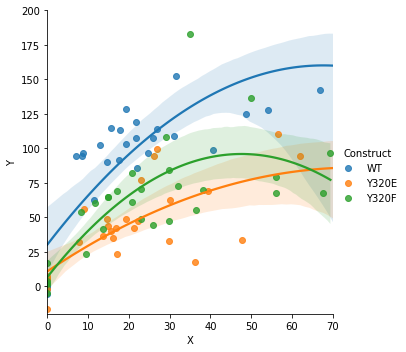

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from scipy import stats
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/SR_project/ploy_58.pdf"
pdf = getPDF(cfile)
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lmplot(data=data58, x="X", y="Y", hue="Construct",order=2)#,lowess=True
#sns.residplot(data=WT_68, x="X", y="Y", order=2)
#sns.residplot(data=Y320F_68, x="X", y="Y", lowess=True)
plt.xlim(0, 70)
plt.ylim(-20, 200)
#plt.yscale('log')
#sns.lmplot(x="X", y="Y", data=data1,order=2, ci=None, scatter_kws={"s": 80})

pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

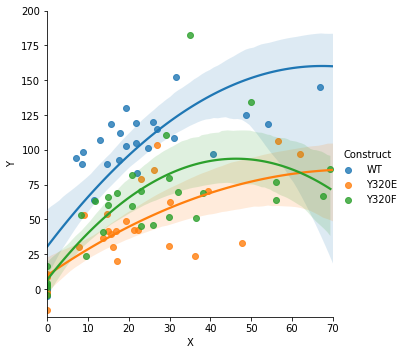

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from scipy import stats
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/SR_project/ploy_58.pdf"
pdf = getPDF(cfile)

sns.lmplot(data=data58, x="X", y="Y", hue="Construct",order=2)#,lowess=True
plt.xlim(0, 70)
plt.ylim(-20, 200)


pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

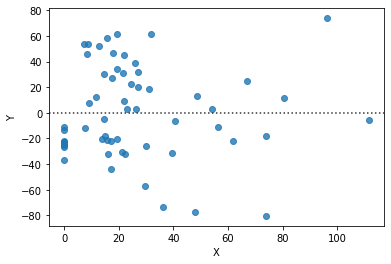

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from scipy import stats
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/SR_project/WTY320E_68_residual.pdf"
pdf = getPDF(cfile)

sns.residplot(data=WTY320E_68, x="X", y="Y", order=2)


pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

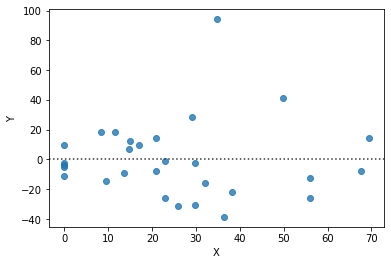

In [44]:
sns.residplot(data=Y320F_68, x="X", y="Y", order=2)

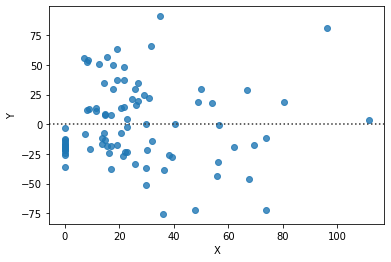

In [40]:
sns.residplot(data=data58, x="X", y="Y",order=2)
#sns.residplot(data=Y320E_68, x="X", y="Y", lowess=True)

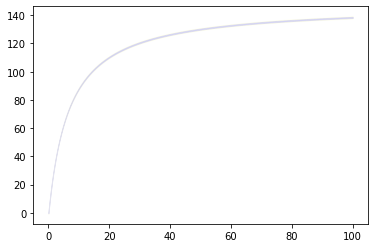

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize
def Hyperbola(x, a, b):
    return (a*x)/(b+x)
params = [147.9, 6.8]
x = np.linspace(0, 100, 250)
#y = Hyperbola(x, params[0], params[1])
a=147.9
b=6.8
y=(a*x)/(b+x)
# Define the confidence interval
ci = 1.96 * np.std(y) / np.mean(y)
# Plot the confidence interval
plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.1)
plt.fill_between(x, (y-2*ci), (y+2*ci), color='yellow', alpha=.05)
#plt.plot(x, y, label='WT model')  
#plt.legend(loc='lower right') 

#sns.lmplot(data=WTY320F_68, x="X", y="Y", hue="Construct")#,lowess=True
plt.show()


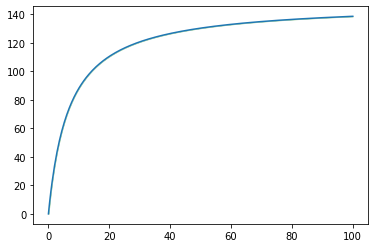

In [10]:
from matplotlib import pyplot as plt
import numpy as np
# Create the data set
x = np.linspace(0, 100, 250)
a=147.9
b=6.8
y=(a*x)/(b+x)# Define the confidence interval
ci = 0.1 * np.std(y) / np.mean(y)
# Plot the sinus function
plt.plot(x, y)
# Plot the confidence interval
plt.fill_between(x, (y-2*ci), (y+2*ci), color='g', alpha=0.25)
plt.show()

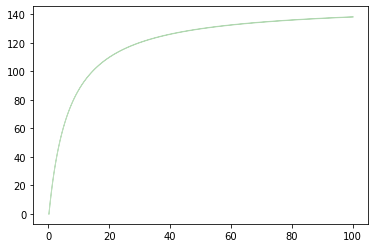

In [12]:
plt.fill_between(x, (y-2*ci), (y+2*ci), color='g', alpha=0.25)


In [69]:
from scipy.optimize import curve_fit
parameters, covariance = curve_fit(parabola, WT_68.X, WT_68.Y)
plt.plot(X, Y)
plt.show()

NameError: name 'X' is not defined

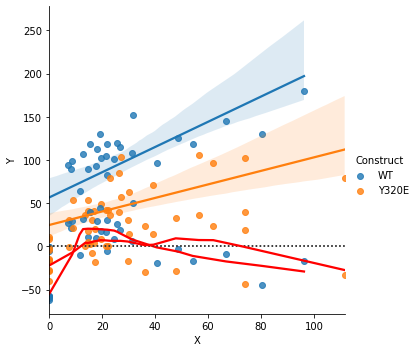

In [45]:
sns.lmplot(data=WTY320E_68, x="X", y="Y", hue="Construct",fit_reg=True)#,lowess=True
sns.residplot(data=WT_68, x="X", y="Y", lowess=True, line_kws=dict(color="r"))
sns.residplot(data=Y320E_68, x="X", y="Y", lowess=True, line_kws=dict(color="r"))

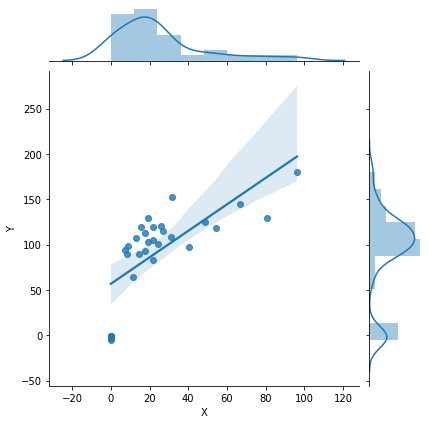

In [58]:
sns.jointplot(x="X", y="Y", data=WT_68, kind="reg")


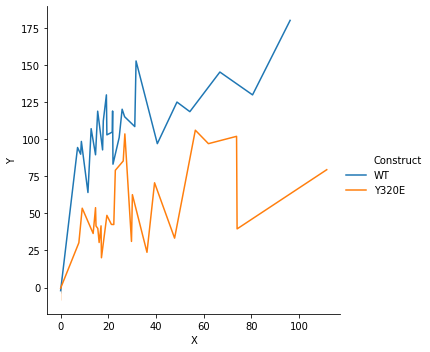

In [59]:
sns.relplot(data=WTY320E_68, x="X", y="Y",kind="line",hue="Construct")

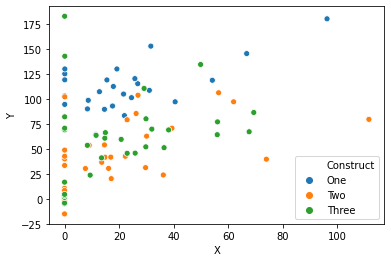

In [32]:
sns.scatterplot(data=data68, x="X", y="Y", hue="Construct")
#sns.rugplot(data=data68, x="X", y="Y", hue="Construct")

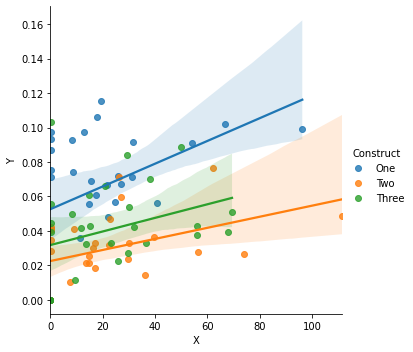

In [25]:
sns.lmplot(data=data58, x="X", y="Y", hue="Construct")#,lowess=True
#sns.jointplot(x="X", y="Y", data=data1, kind="reg", hue="Construct");
#plt.xscale('log')
#plt.yscale('log')
#sns.lmplot(x="X", y="Y", data=data1,order=2, ci=None, scatter_kws={"s": 80})

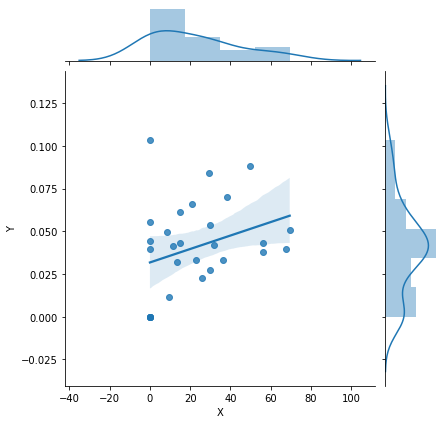

In [16]:
sns.jointplot(x="X", y="Y", data=C3_58, kind="reg")


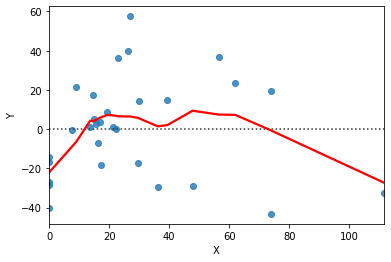

In [19]:
sns.residplot(data=Y320E_68, x="X", y="Y", lowess=True, line_kws=dict(color="r"))

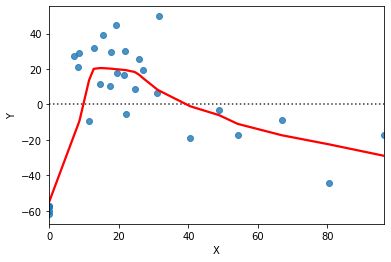

In [18]:
sns.residplot(data=WT_68, x="X", y="Y", lowess=True, line_kws=dict(color="r"))

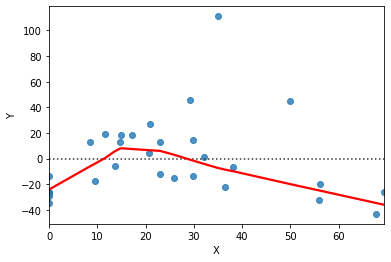

In [20]:
sns.residplot(data=Y320F_68, x="X", y="Y", lowess=True, line_kws=dict(color="r"))

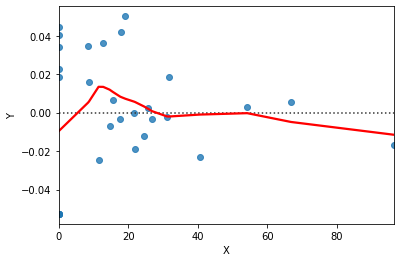

In [22]:
sns.residplot(data=C1_58, x="X", y="Y", lowess=True, line_kws=dict(color="r"))

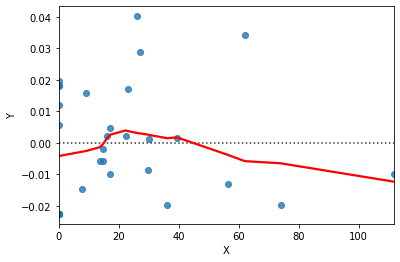

In [23]:
sns.residplot(data=C2_58, x="X", y="Y", lowess=True, line_kws=dict(color="r"))

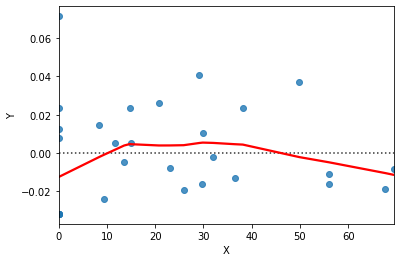

In [24]:
sns.residplot(data=C3_58, x="X", y="Y", lowess=True, line_kws=dict(color="r"))

In [ ]:
plt.scatter(df.x, df.y)